# stage1_443996_m5_lick_rates

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile
import cv2
from PIL import Image
import plotly.express as px
import imagecodecs
from matplotlib.animation import FuncAnimation
import tkinter as tk
from tkinter import filedialog
import os

from functions_lick_rates import (licked_txt,
                                    load_files_from_folder,
                                    select_folder,
                                    licking,
                                    plot_array)

In [2]:
stage = "stage1"
file_data = select_folder(stage)
lick_rate = licking(file_data, stage)

Selected folder: X:/Raymond Lab/1_Kai/2_Pi_data/1_first_cohort/443996/stage1_443996_m5/lick_rates
Loading file: X:/Raymond Lab/1_Kai/2_Pi_data/1_first_cohort/443996/stage1_443996_m5/lick_rates\443996_m5_stage1_day1_2024-02-13_17-01-01_data.txt
Loading file: X:/Raymond Lab/1_Kai/2_Pi_data/1_first_cohort/443996/stage1_443996_m5/lick_rates\443996_m5_stage1_day2_2024-02-14_15-25-04_data.txt
Loading file: X:/Raymond Lab/1_Kai/2_Pi_data/1_first_cohort/443996/stage1_443996_m5/lick_rates\443996_m5_stage1_day3_2024-02-15_13-13-11_data.txt
Loading file: X:/Raymond Lab/1_Kai/2_Pi_data/1_first_cohort/443996/stage1_443996_m5/lick_rates\443996_m5_stage1_day4_2024-02-16_11-09-43_data.txt
Loading file: X:/Raymond Lab/1_Kai/2_Pi_data/1_first_cohort/443996/stage1_443996_m5/lick_rates\443996_m5_stage1_day5_2024-02-17_12-25-29_data.txt
Loading file: X:/Raymond Lab/1_Kai/2_Pi_data/1_first_cohort/443996/stage1_443996_m5/lick_rates\443996_m5_stage1_day6_2024-02-18_13-28-47_data.txt
Loading file: X:/Raymond L

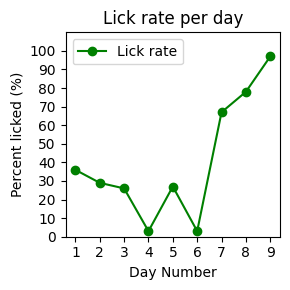

In [3]:
plot_array(lick_rate,stage)